In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [3]:
#mapping tools
!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install folium
import folium # map rendering library

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
    100% |████████████████████████████████| 92kB 14.1MB/s ta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


#### The aim of the project is to identify restraunts that exclusivly serve indian food in hyderabad. In this notebook, we will identify various joints in Hyedrbad city, India, using Foursquare API to help visitors select the restaurants/hotels/bar that suit them the best. Whenever a user is planning to visit a city they start looking for Hotel during their stay. Here, we'll identify places that are fit for various individuals based on the information collected from the FourSquare APIs, Goibibo API and Data Science. Once we have the plot with the venues, any company can launch an application using the same data and suggest users such information.

# Finding the location of all indian restaurants in hyderabad

In [25]:
address = 'Hyderabad'

geolocator = Nominatim(user_agent="customer")
location = geolocator.geocode(address,timeout=10)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hyderabad are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hyderabad are 17.3616079, 78.4746286.


In [26]:
Hyderabad_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.Marker([latitude, longitude]).add_to(Hyderabad_map)
Hyderabad_map

### Define Foursquare Credentials and Version

In [27]:
CLIENT_ID = 'OXCVX1KZYSJOKI03XPQLIZG1QGNDZEAQREG2FOH53W1CEE34' # your Foursquare ID
CLIENT_SECRET = 'UIKLLCX5AP5XZPDV35CHQVU2KWPN0LDXIC1VTN3BM4YMZCMC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OXCVX1KZYSJOKI03XPQLIZG1QGNDZEAQREG2FOH53W1CEE34
CLIENT_SECRET:UIKLLCX5AP5XZPDV35CHQVU2KWPN0LDXIC1VTN3BM4YMZCMC


In [28]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 10000 # define radius - 10 KM

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url 


'https://api.foursquare.com/v2/venues/explore?&client_id=OXCVX1KZYSJOKI03XPQLIZG1QGNDZEAQREG2FOH53W1CEE34&client_secret=UIKLLCX5AP5XZPDV35CHQVU2KWPN0LDXIC1VTN3BM4YMZCMC&v=20180605&ll=17.3616079,78.4746286&radius=10000&limit=100'

In [32]:
from pandas.io.json import json_normalize

In [33]:

results = requests.get(url).json()
#results

In [74]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Clean the json and structure it into Pandas dataframe

In [35]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.address', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,address,lat,lng
0,Chowmahala Palace,History Museum,"Moti Gali, Charminar",17.359300,78.471617
1,Shadaab,Diner,NaN,17.368661,78.475572
2,Hotel Shah Ghouse,Snack Place,Shahalibanda,17.347899,78.470986
3,Govind Ki Idly,South Indian Restaurant,Charminar,17.364132,78.473771
4,Pista house,Indian Restaurant,Shalibanda,17.356609,78.473637
5,Charminar,Monument / Landmark,Old City,17.361555,78.474677
6,Taj Falaknuma Palace,Hotel,"Engine Bowli, Falaknuma",17.330118,78.467460
7,Mayur Pan Shop,Juice Bar,Hanuman Tekdi Rd.,17.388894,78.480578
8,Pragati,South Indian Restaurant,"Kandaswamy Lane, Sultan Bazaar, Koti Andhra Pr...",17.388088,78.481134
9,Karachi Bakery,Bakery,"Mozzamjahi Market, Nizam Shahi Road, Abids",17.383454,78.475075


### Find how many unique categories are there

In [36]:
Hyderabad_map = folium.Map(location = [latitude, longitude], zoom_start = 13)

for name, latitude, longitude in zip(nearby_venues['name'], nearby_venues['lat'], nearby_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'Blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(Hyderabad_map)  

Hyderabad_map

In [37]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(nearby_venues['categories'].unique())))

There are 45 uniques categories.


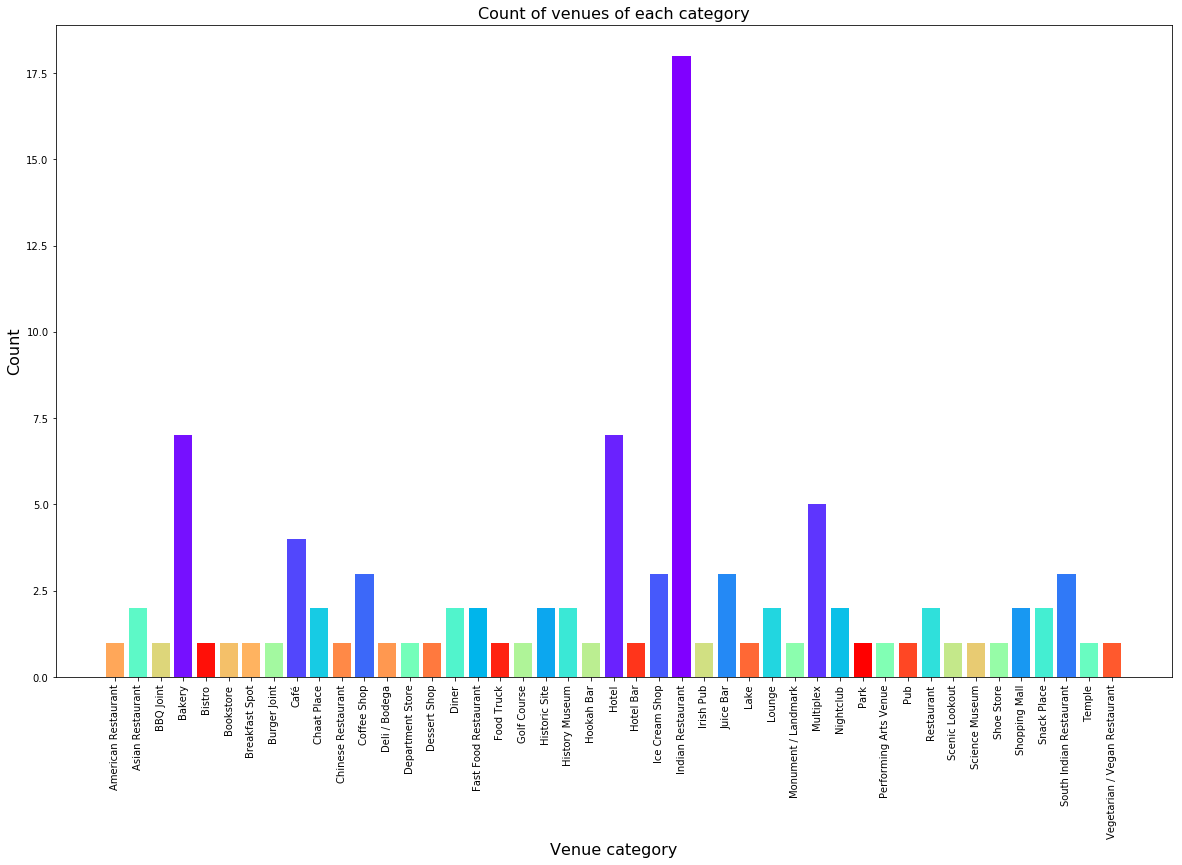

In [39]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

venue_distribution = nearby_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)
plt.show()

In [43]:
nearby_Restaurant = nearby_venues.loc[nearby_venues['categories'] == 'Indian Restaurant']
nearby_Restaurant.index = range(len(nearby_Restaurant))
nearby_Restaurant

,name,categories,address,lat,lng
0,Pista house,Indian Restaurant,Shalibanda,17.356609,78.473637
1,Santosh Dhaba,Indian Restaurant,NaN,17.388485,78.479509
2,Hotel Sohail,Indian Restaurant,NaN,17.372829,78.499298
3,Cafe Bahar,Indian Restaurant,"3-5-815, Hyderguda",17.399595,78.478566
4,Minerva Coffee Shop,Indian Restaurant,Himyathnagar,17.401410,78.485672
5,Sarvi,Indian Restaurant,Banjara Hills,17.412698,78.449704
6,Grand Hotel,Indian Restaurant,Abids,17.387760,78.477577
7,Zafraan Exotica,Indian Restaurant,Rd #12 Banjara Hills,17.410325,78.437299
8,Kebabs & Kurries,Indian Restaurant,"Greenlands Flyover, Greenlands, Punjagutta",17.432374,78.457585
9,Paradise Food Court,Indian Restaurant,Beside Prasadz,17.412113,78.465443


### map of all location of indian restaurant in hyderabad 

In [73]:
Restaurant_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
for name, address, latitude, longitude in zip(nearby_Restaurant['name'], 
                                                 nearby_Restaurant['address'],
                                                 nearby_Restaurant['lat'], 
                                                 nearby_Restaurant['lng']):
    label = '{}','{}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        popup = label).add_to(Restaurant_map)
Restaurant_map